## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
#determine the number of mice
numMice = len(study_data_complete["Mouse ID"].unique())

#print the number of mice
numMice

249

In [50]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicateMice = study_data_complete.loc[study_data_complete.duplicated(["Mouse ID", "Timepoint"])]
duplicateMice["Mouse ID"]


137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateMiceData = study_data_complete.loc[study_data_complete["Mouse ID"] == "g989"]

# set the index to the mouse ID
duplicateMiceData.set_index("Mouse ID")

# check the mouse data for ID

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data = study_data_complete[study_data_complete["Mouse ID"].isin(duplicateMice)==False]

clean_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
cleanNumMice = len(clean_study_data["Mouse ID"].unique())

#print the number of mice in clean data set
cleanNumMice

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# variable to hold the Mean Tumor Volume Data Grouped by Drug Regimen
mean = clean_study_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]

# variable to hold median Tumor Volume Data Grouped by Drug Regimen
median = clean_study_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]

# variable to hold the Tumor Volume Variance Data Grouped by Drug Regimen
variance = clean_study_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]

# variable to hold the Tumor Volume Standard Deviation Data Grouped by Drug Regimen
stdev = clean_study_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]

# variable to hold the Tumor Volume SEM Data Grouped by Drug Regimen
sem = clean_study_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
summaryStatisticsDF = pd.DataFrame({
    "Mean Tumor Value": mean,
    "Median Tumor Value": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Stdev":stdev,
    "Tumor Volume SEM": sem
})

# Preview DataFrame
summaryStatisticsDF

,Mean Tumor Value,Median Tumor Value,Tumor Volume Variance,Tumor Volume Stdev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_table = clean_study_data.groupby("Drug Regimen").aggregate({
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
})

summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# list of unique drug regimens
drug_regimen = clean_study_data["Drug Regimen"].unique()

# drug regimen as x-axis values for plotting

# drop all duplicate mice
uniqueMice = clean_study_data["Mouse ID"].drop_duplicates()

# get mice counts per drug
counts = clean_study_data["Drug Regimen"].value_counts()
counts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

Text(0, 0.5, 'Total Number of Measurements')

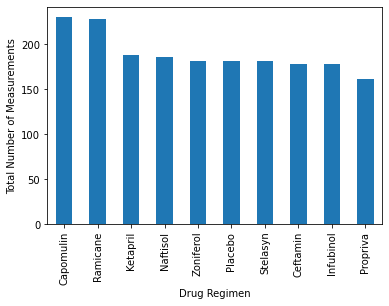

In [11]:
# plot the mouse counts for each drug using pandas
counts.plot(kind = "bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")

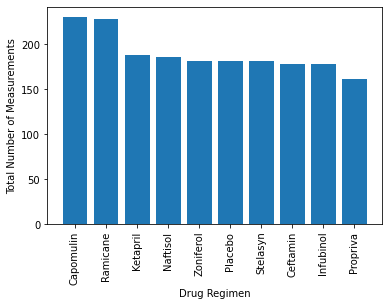

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# plot the bar graph of mice count per drug regimen
plt.bar(counts.index.values, counts.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")

plt.xticks(rotation=90)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

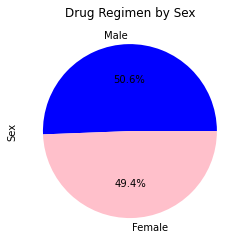

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
countsGender = clean_study_data["Sex"].value_counts()

colors = ["blue", "pink"] 

countsGender.plot(kind = "pie", colors = colors, autopct = "%1.1f%%")
plt.title("Drug Regimen by Sex")

plt.show

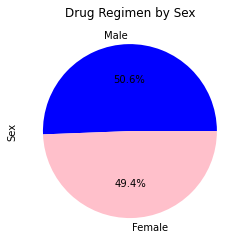

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(countsGender.values, labels = countsGender.index.values, colors = colors, autopct = "%1.1f%%")

plt.ylabel("Sex")
plt.title("Drug Regimen by Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [54]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# set drug regimen as index and drop associated regimens while only keeping Capomulin, Ramicane, Infubinol, and Ceftamin
sample = clean_study_data[clean_study_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# isolated view of just capomulin for later use
capomulin_sample = clean_study_data.loc[clean_study_data["Drug Regimen"] == "Capomulin"]

# Reset index so drug regimen column persists after inner merge


# get mouse count per drug
sampleCounts = sample["Drug Regimen"].value_counts()

# Start by getting the last (greatest) timepoint for each mouse
lastTumorVol = sample.groupby("Mouse ID")["Timepoint"].max()
lastTumorVol = lastTumorVol.reset_index()
lastTumorVol.head()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45


In [30]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
cleanMergedDF = lastTumorVol.merge(sample, on=["Mouse ID", "Timepoint"], how="left")

cleanMergedDF = cleanMergedDF.set_index("Mouse ID")
cleanMergedDF = cleanMergedDF.sort_values("Timepoint", ascending = True)

# show all rows of data
pd.set_option('display.max_rows', None)

cleanMergedDF

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
t573,0,45.000000,0,Ceftamin,Female,15,27
u153,0,45.000000,0,Ceftamin,Female,11,25
x226,0,45.000000,0,Ceftamin,Male,23,28
b447,0,45.000000,0,Ceftamin,Male,2,30
v339,5,46.250112,0,Infubinol,Male,20,26
m756,5,47.010364,1,Infubinol,Male,19,30
h531,5,47.784682,0,Ceftamin,Male,5,27
w678,5,43.166373,0,Ramicane,Female,5,24
c326,5,36.321346,0,Infubinol,Female,18,25


In [53]:
# Put treatments into a list for for loop (and later for plot labels)

drug_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorVolList = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatments in drug_regimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    finalTumorVolCount = cleanMergedDF.loc[cleanMergedDF["Drug Regimen"]==treatments,"Tumor Volume (mm3)"]
    
    # add subset 
    tumorVolList.append(finalTumorVolCount)
    
    # Determine outliers using upper and lower bounds 
    quartiles = finalTumorVolCount.quantile([0.25,0.5,0.75])
    
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lowerbound = lowerq - (1.5 * iqr)
    upperbound = upperq + (1.5 * iqr)
    
    outliers = finalTumorVolCount.loc[(finalTumorVolCount < lowerbound) | (finalTumorVolCount > upperbound)]
    
    print(treatments)
    print(f"The lower quartile of Tumor Volume is: {lowerq}")
    print(f"The upper quartile of Tumor Volume is: {upperq}")
    print(f"The interquartile range of Tumor Volume is: {iqr}")
    print(f"Values below {lowerbound} could be outliers.")
    print(f"Values above {upperbound} could be outliers.")
    print(f"{treatments}'s potential outliers: \n{outliers}\n")
   

Capomulin
The lower quartile of Tumor Volume is: 32.37735684
The upper quartile of Tumor Volume is: 40.1592203
The interquartile range of Tumor Volume is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Capomulin's potential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane
The lower quartile of Tumor Volume is: 31.56046955
The upper quartile of Tumor Volume is: 40.65900627
The interquartile range of Tumor Volume is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Ramicane's potential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol
The lower quartile of Tumor Volume is: 54.04860769
The upper quartile of Tumor Volume is: 65.52574285
The interquartile range of Tumor Volume is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Infubinol's poten

In [41]:
# tumor volumes for each Drug Regimen
capomulin_sample = sample.loc[sample["Drug Regimen"] == "Capomulin"]
capomulin_tumors = capomulin_sample["Tumor Volume (mm3)"]

ramicane_sample = sample.loc[sample["Drug Regimen"] == "Ramicane"]
ramicane_tumors = ramicane_sample["Tumor Volume (mm3)"]

infubinol_sample = sample.loc[sample["Drug Regimen"] == "Infubinol"]
infubinol_tumors = infubinol_sample["Tumor Volume (mm3)"]

ceftamin_sample = sample.loc[sample["Drug Regimen"] == "Ceftamin"]
ceftamin_tumors = ceftamin_sample["Tumor Volume (mm3)"]


<function matplotlib.pyplot.show(close=None, block=None)>

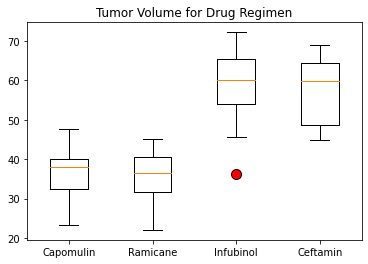

In [47]:
#set drugs to be analyzed, colors for the plots, and markers
red_out = dict(markerfacecolor = "red", markersize = 10)

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumorVolList, labels=drug_regimen, flierprops = red_out)
plt.title("Tumor Volume for Drug Regimen")
plt.show

## Line and Scatter Plots

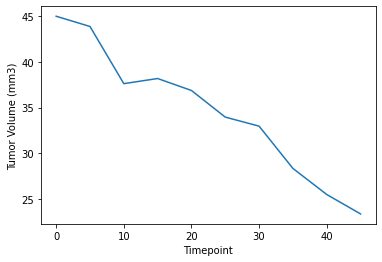

In [74]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#change index to mouse ID


#remove other mouse IDs so only s185 shows
mouseData = capomulin_sample.loc[capomulin_sample["Mouse ID"]=="s185"]
mouseData

#set the x-axis equal to the Timepoint and y-axis to Tumor Volume
plt.plot(mouseData["Timepoint"], mouseData["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

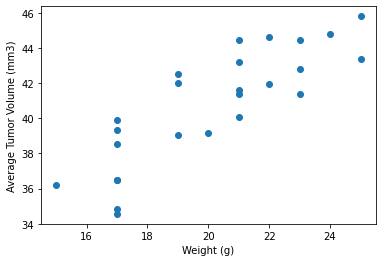

In [70]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# group by mouse ID to find average tumor volume
capomulin_average = capomulin_sample.groupby("Mouse ID").mean()

# establish x-axis value for the weight of the mice
x_axis = capomulin_average["Weight (g)"]

# produce scatter plot of the data
plt.scatter(x_axis, capomulin_average["Tumor Volume (mm3)"])
plt.xlabel ("Weight (g)")
plt.ylabel ("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between weight and the average tumor value is 0.84


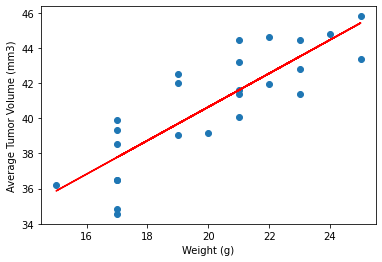

In [79]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#establish x and y values and find St. Pearson Correlation Coefficient for Mouse Weight and Tumor Volume Avg
correlation = round(st.pearsonr(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])[0],2)

#print St. Pearson Correlation Coefficient
print(f"The correlation between weight and the average tumor value is {correlation:.2f}")

# establish linear regression values
model = st.linregress(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])

# linear regression line 
yvalues = (capomulin_average["Weight (g)"] * model[0]) + model[1]

# scatter plot of the data
plt.scatter(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
plt.xlabel ("Weight (g)")
plt.ylabel ("Average Tumor Volume (mm3)")

plt.plot(capomulin_average["Weight (g)"], yvalues, color = "red")

plt.show()